In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 


In [2]:
df  = pd.read_csv('economic_index.csv')
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [3]:
## drop unnecessary columns
df = df.drop(['Unnamed: 0', 'year', 'month'], axis = 1)
df.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [4]:
## common code to check for missing values
df.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

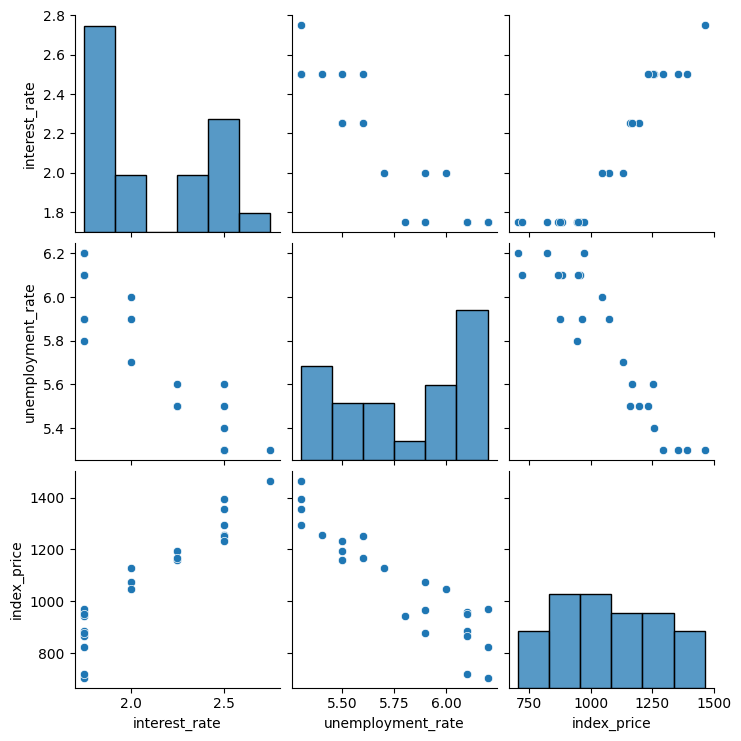

In [5]:
## visualize the data
sns.pairplot(df)

In [6]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'Unemployment Rate')

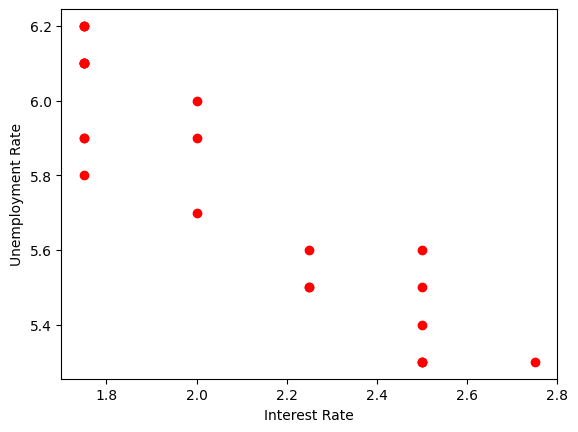

In [7]:
## visualize the datapoints
plt.scatter(df['interest_rate'], df['unemployment_rate'], color = 'red')
plt.xlabel('Interest Rate')
plt.ylabel('Unemployment Rate')


Text(0, 0.5, 'Index Price')

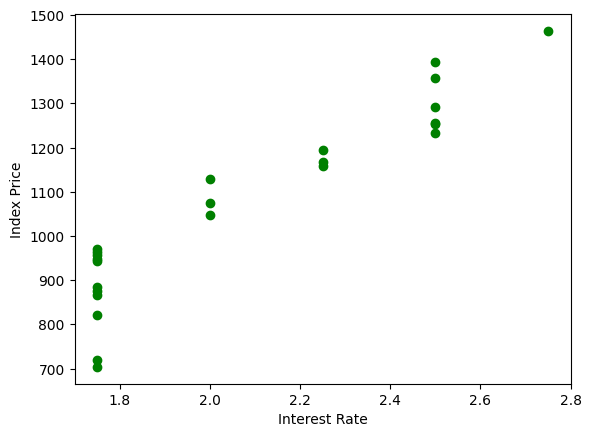

In [8]:
plt.scatter(df['interest_rate'], df['index_price'], color = 'green')
plt.xlabel('Interest Rate')
plt.ylabel('Index Price')

In [9]:
## independent and dependent features
X = df[['interest_rate', 'unemployment_rate']]
y = df['index_price']

In [10]:
## train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

<Axes: xlabel='interest_rate', ylabel='index_price'>

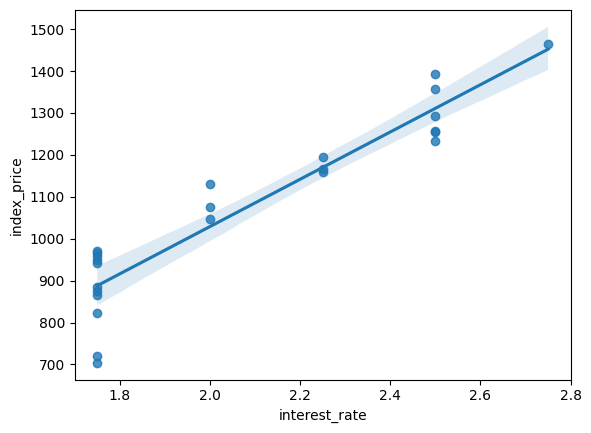

In [11]:
sns.regplot(x=df['interest_rate'], y=df['index_price'])

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

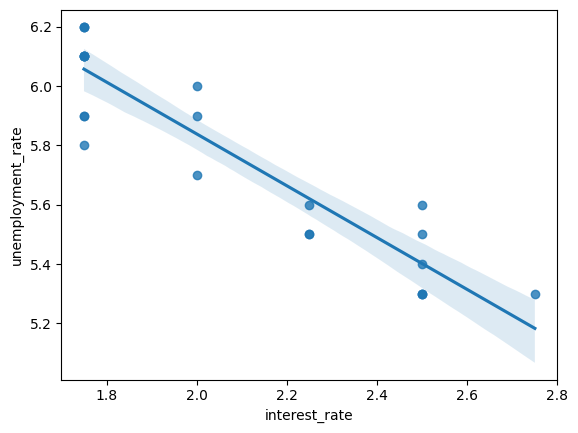

In [12]:
sns.regplot(x=df['interest_rate'], y=df['unemployment_rate'])

<Axes: xlabel='index_price', ylabel='unemployment_rate'>

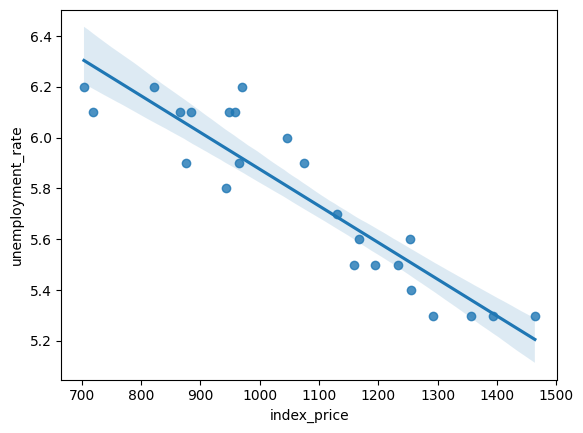

In [13]:
sns.regplot(x=df['index_price'], y=df['unemployment_rate'])

In [14]:
from sklearn.preprocessing import StandardScaler
scaler  = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [17]:
X_train

array([[-0.90115511,  0.37908503],
       [ 1.31077107, -1.48187786],
       [-0.90115511,  1.30956648],
       [ 1.31077107, -0.55139641],
       [ 1.31077107, -1.48187786],
       [-0.16384638,  0.68924552],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -1.48187786],
       [ 1.31077107, -1.17171738],
       [-0.90115511,  1.30956648],
       [-0.90115511,  0.999406  ],
       [-0.90115511,  0.37908503],
       [-0.90115511,  0.999406  ],
       [ 0.57346234, -0.8615569 ],
       [-0.16384638, -0.24123593],
       [-0.90115511,  0.06892455],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -0.8615569 ]])

In [18]:
from sklearn.linear_model import LinearRegression
regressor  = LinearRegression(n_jobs = -1)

In [19]:
regressor.fit(X_train,y_train)

LinearRegression(n_jobs=-1)

In [ ]:
## Cross Validation
from sklearn.model_selection import cross_val_score
validation_score = cross_val_score(regressor, X_train, y_train, scoring='neg_mean_squared_error', cv=3)

In [22]:
np.mean(validation_score)

np.float64(-5914.828180162386)

In [23]:
## Predictions 
y_pred = regressor.predict(X_test)

In [24]:
y_pred

array([1204.22770398,  821.65051903, 1406.51300368,  857.70889608,
        994.90992298, 1168.16932693])

In [25]:
## Performance metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
## R2 Score
print('R2 Score:', r2_score(y_test, y_pred))

MAE: 59.935781523235484
MSE: 5793.762887712569
RMSE: 76.11677139574805
R2 Score: 0.8278978091457145


In [26]:
## adjusted R2 score
1-(1-r2_score(y_test, y_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.7131630152428576

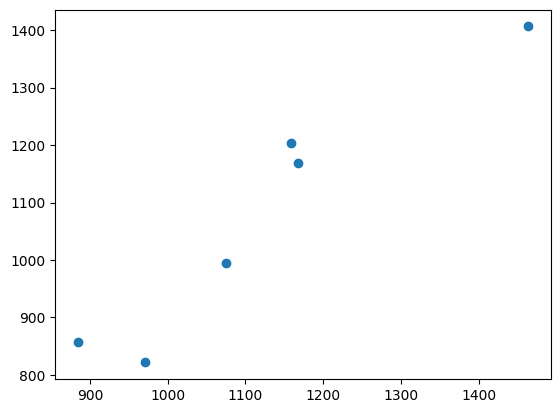

In [27]:
## Assumptions 
plt.scatter(y_test, y_pred)

In [28]:
residuals = y_test - y_pred
residuals

8     -45.227704
16    149.349481
0      57.486996
18     26.291104
11     80.090077
9      -1.169327
Name: index_price, dtype: float64

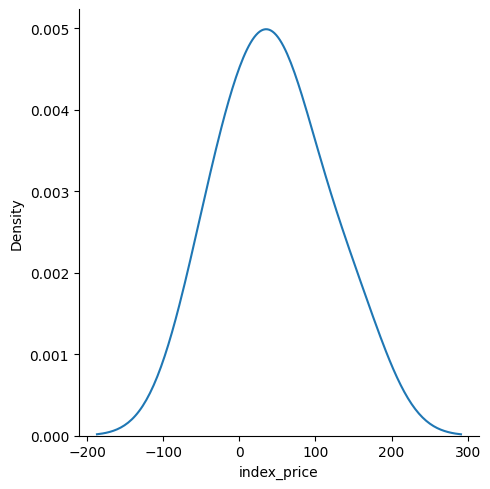

In [29]:
## plot residulas 
sns.displot(residuals, kind='kde')

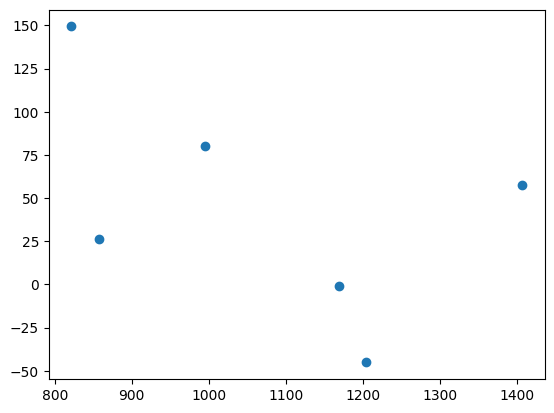

In [30]:
## Scatter plot with respect to predictions and residuals 
plt.scatter(y_pred, residuals)

In [31]:
# Example: interest_rate = 5, unemployment_rate = 7
new_data = [[5, 7]]

# Scale it using the same scaler
new_data_scaled = scaler.transform(new_data)

# Predict with trained regression model
prediction = regressor.predict(new_data_scaled)
print("Predicted index price:", prediction)

Predicted index price: [1379.279049]


c:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
